In [1]:
import pandas as pd
train_dataset = pd.read_csv('corpus-raymond/train-full-hf-style.csv')
val_dataset = pd.read_csv('corpus-raymond/val-full-hf-style.csv')
test_dataset = pd.read_csv('corpus-raymond/test-full-hf-style.csv')
#take column 'tokens' as list
train_dataset['tokens'] = train_dataset['tokens'].apply(eval)
val_dataset['tokens'] = val_dataset['tokens'].apply(eval)
test_dataset['tokens'] = test_dataset['tokens'].apply(eval)

#take column 'IOB_tag' as list
train_dataset['IOB_tag'] = train_dataset['IOB_tag'].apply(eval)
val_dataset['IOB_tag'] = val_dataset['IOB_tag'].apply(eval)
test_dataset['IOB_tag'] = test_dataset['IOB_tag'].apply(eval)


In [2]:
!python --version

Python 3.11.11


In [3]:
iob_mapping = {
    "O": 0,
    "B-class": 1,
    "I-class": 2,
    "B-attr": 3,
    "I-attr": 4
}

label_names = [ 'O', 'B-class', 'I-class', 'B-attr', 'I-attr' ]

In [4]:
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}
id2label[5] = "[PAD]"
label2id["[PAD]"] = 5
print(id2label)
print(label2id)

{0: 'O', 1: 'B-class', 2: 'I-class', 3: 'B-attr', 4: 'I-attr', 5: '[PAD]'}
{'O': 0, 'B-class': 1, 'I-class': 2, 'B-attr': 3, 'I-attr': 4, '[PAD]': 5}


In [5]:
words = train_dataset.iloc[0]["tokens"]
labels = train_dataset.iloc[0]["IOB_tag"]
line1 = ""
line2 = ""
for word, label in zip(words, labels):
    full_label = label_names[label]
    max_length = max(len(word), len(full_label))
    line1 += word + " " * (max_length - len(word) + 1)
    line2 += full_label + " " * (max_length - len(full_label) + 1)

print(line1)
print(line2)

. HTTPS with browser web button account customer new sdram MB 128 ; chip ram Flash ; GB : requirement hardware follow the to adhere 4 Intel XScale PXA270 a Register 
O O     O    O       O   O      I-class B-class  O   O     O  O   O O    O   O     O O  O O           O        O      O   O  O      O O     O      O      O O        


In [6]:
from transformers import AutoTokenizer
import os
from pathlib import Path
tokenizer = "FacebookAI/roberta-large"
model_checkpoint = "FacebookAI/roberta-large"
folder_name = "BERT-Style-result/FacebookAI/robertaCRF-large-10-epoch-32bs"
model_name_save = "BERT-Style-model/FacebookAI/robertaCRF-large-10-epoch-32bs"
Path(folder_name).mkdir(parents=True, exist_ok=True)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True )

max_length = 256
epochs = 10
bs = 32

In [7]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = 5 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(5)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [8]:
inputs = tokenizer(train_dataset.iloc[0]["tokens"],truncation=True, is_split_into_words=True, padding='max_length', max_length=max_length)
labels = train_dataset.iloc[0]["IOB_tag"]
word_ids = inputs.word_ids()
print(inputs)
print(labels)
print(align_labels_with_tokens(labels, word_ids))

{'input_ids': [0, 479, 45217, 19, 11407, 3748, 6148, 1316, 2111, 92, 46409, 4040, 17025, 13950, 25606, 6638, 19634, 15626, 25606, 7216, 4832, 7404, 6554, 1407, 5, 7, 20696, 204, 6869, 1577, 43737, 221, 1000, 250, 21063, 10, 10315, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
def tokenize_and_align_labels(df):
    # Convert Pandas DataFrame to dictionary format (column-based)
    examples = df.to_dict(orient="list")

    # Tokenize the input tokens
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, padding='max_length', max_length=max_length
    )

    all_labels = examples["IOB_tag"]
    rearranged_labels = []

    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        rearranged_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = rearranged_labels
    return tokenized_inputs


In [10]:
tokenized_train = tokenize_and_align_labels(train_dataset)
tokenized_val = tokenize_and_align_labels(val_dataset)
tokenized_test = tokenize_and_align_labels(test_dataset)

In [11]:
from datasets import Dataset
# convert tokenized train to arrow dataset class
train_dataset = Dataset.from_dict(tokenized_train)
val_dataset = Dataset.from_dict(tokenized_val)
test_dataset = Dataset.from_dict(tokenized_test)

# Data Collation

In [12]:
# from transformers import DataCollatorForTokenClassification

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# Metrics

In [13]:
import evaluate

metric = evaluate.load("seqeval")

In [14]:
import numpy as np


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

# Defining the model

In [15]:
import torch
from torch import nn
from transformers import AutoModelForTokenClassification, AutoConfig
from torchcrf import CRF
from torch.optim import AdamW

class TokenClassificationWithCRF(nn.Module):
    def __init__(self, model_checkpoint, num_labels):
        super(TokenClassificationWithCRF, self).__init__()
        self.config = AutoConfig.from_pretrained(model_checkpoint, num_labels=num_labels)
        self.base_model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, config=self.config)
        self.crf = CRF(num_labels, batch_first=True)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.base_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Shape: (batch_size, seq_len, num_labels)
        
        if labels is not None:
            # Compute CRF loss
            loss = -self.crf(logits, labels, mask=attention_mask.byte(), reduction='mean')
            return {"loss": loss, "logits": logits}
        else:
            # Decode using CRF
            predictions = self.crf.decode(logits, mask=attention_mask.byte())
            return {"logits": logits, "predictions": predictions}

# Initialize the model
num_labels = len(id2label)
model = TokenClassificationWithCRF(model_checkpoint, num_labels)

# Define optimizer (same as before)
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay': 0.0}
    ]
else:
    param_optimizer = list(model.base_model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

# AdamW optimizer
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5, eps=1e-8)


Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
import torch

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# device = "cuda"
print(device)
model.to(device)

cuda:0


TokenClassificationWithCRF(
  (base_model): RobertaForTokenClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 1024, padding_idx=1)
        (position_embeddings): Embedding(514, 1024, padding_idx=1)
        (token_type_embeddings): Embedding(1, 1024)
        (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-23): 24 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSdpaSelfAttention(
                (query): Linear(in_features=1024, out_features=1024, bias=True)
                (key): Linear(in_features=1024, out_features=1024, bias=True)
                (value): Linear(in_features=1024, out_features=1024, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutp

# Preparing Fine Tuning

In [17]:
# Convert the dataset to torch tensors
train_inputs = torch.tensor(train_dataset["input_ids"])
dev_inputs = torch.tensor(val_dataset["input_ids"])
test_inputs = torch.tensor(test_dataset["input_ids"])
train_tags = torch.tensor(train_dataset["labels"])
dev_tags = torch.tensor(val_dataset["labels"])
test_tags = torch.tensor(test_dataset["labels"])
train_masks = torch.tensor(train_dataset["attention_mask"])
dev_masks = torch.tensor(val_dataset["attention_mask"])
test_masks = torch.tensor(test_dataset["attention_mask"])

In [18]:
from torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler

# We define the dataloaders. 
# Shuffle the data for training using RandomSampler
train_data = TensorDataset(train_inputs, train_masks, train_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

# Load dev and test data sequentially with SequentialSampler.
dev_data = TensorDataset(dev_inputs, dev_masks, dev_tags)
dev_sampler = SequentialSampler(dev_data)
dev_dataloader = DataLoader(dev_data, sampler=dev_sampler, batch_size=bs)

test_data = TensorDataset(test_inputs, test_masks, test_tags)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=bs)

In [19]:
# Import a scheduler to reduce the learning rate 
from transformers import get_linear_schedule_with_warmup

# Number of training epochs; the BERT paper uses 10
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training

In [20]:
import torch
import numpy as np
from sklearn.metrics import f1_score
from tqdm import trange

loss_values, development_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    #
    # Training
    #
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs["loss"]  # Extract loss correctly
        loss.backward()

        total_loss += loss.item()
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average train loss: {avg_train_loss:.4f}")
    loss_values.append(avg_train_loss)

    #
    # Evaluation
    #
    model.eval()
    eval_loss, predictions, true_labels = 0, [], []

    for batch in dev_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        loss = outputs["loss"].mean().item()
        eval_loss += loss
    
        logits = outputs["logits"]  # Extract logits
        preds = model.crf.decode(logits)  # Decode using CRF
    
        predictions.extend(preds)
        true_labels.extend(b_labels.cpu().numpy())

    eval_loss /= len(dev_dataloader)
    development_loss_values.append(eval_loss)
    print(f"Development loss: {eval_loss:.4f}")

    pred_tags = []
    dev_tags = []
    
    for pred_seq, true_seq in zip(predictions, true_labels):
        for p_i, l_i in zip(pred_seq, true_seq):  # Zip ensures matching lengths per sequence
            if id2label[l_i] != "[PAD]":  # Ignore padding tokens
                pred_tags.append(id2label[p_i])
                dev_tags.append(id2label[l_i])
    
    # Ensure equal length before computing F1 score
    assert len(pred_tags) == len(dev_tags), f"Length mismatch: {len(pred_tags)} vs {len(dev_tags)}"
    
    # Compute F1 score
    f1 = f1_score(dev_tags, pred_tags, average='micro')
    output_text = "train-val F1 score: {:.4f}\n".format(f1)

    # Print to console
    print(output_text)

    with open(folder_name + "/f1_score.txt", "a") as file:
        file.write(output_text)


/usr/local/lib/python3.11/site-packages/torchcrf/__init__.py:249: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at /pytorch/aten/src/ATen/native/TensorCompare.cpp:529.)
  score = torch.where(mask[i].unsqueeze(1), next_score, score)


Average train loss: 14.8101


Epoch:  10%|█         | 1/10 [01:42<15:22, 102.50s/it]

Development loss: 16.5539
train-val F1 score: 0.6978

Average train loss: 9.7599


Epoch:  20%|██        | 2/10 [03:28<13:57, 104.73s/it]

Development loss: 7.7082
train-val F1 score: 0.7082

Average train loss: 7.9042


Epoch:  30%|███       | 3/10 [05:14<12:16, 105.15s/it]

Development loss: 9.5928
train-val F1 score: 0.7542

Average train loss: 6.3870


Epoch:  40%|████      | 4/10 [07:00<10:31, 105.33s/it]

Development loss: 8.3127
train-val F1 score: 0.6941

Average train loss: 5.0297


Epoch:  50%|█████     | 5/10 [08:46<08:48, 105.72s/it]

Development loss: 4.8244
train-val F1 score: 0.6928

Average train loss: 4.2155


Epoch:  60%|██████    | 6/10 [10:32<07:03, 105.81s/it]

Development loss: 2.5421
train-val F1 score: 0.6679

Average train loss: 3.4626


Epoch:  70%|███████   | 7/10 [12:17<05:16, 105.55s/it]

Development loss: 4.5048
train-val F1 score: 0.5944

Average train loss: 2.9493


Epoch:  80%|████████  | 8/10 [14:03<03:31, 105.66s/it]

Development loss: 2.6202
train-val F1 score: 0.6895

Average train loss: 2.6119


Epoch:  90%|█████████ | 9/10 [15:49<01:45, 105.91s/it]

Development loss: 4.5516
train-val F1 score: 0.6838

Average train loss: 2.3011


Epoch: 100%|██████████| 10/10 [17:36<00:00, 105.64s/it]

Development loss: 2.0473
train-val F1 score: 0.6316



In [21]:
df = pd.DataFrame(list(zip(pred_tags, dev_tags)),
               columns =['Pred', 'True'])
df.to_csv(folder_name + '/train-val-result-bert.csv')

# Visualize

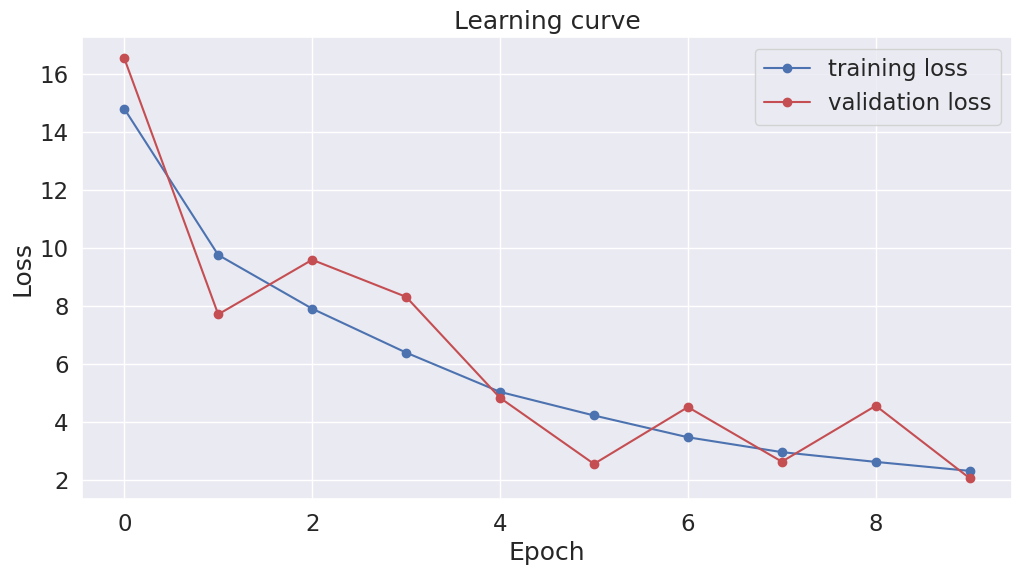

In [22]:
# Plot the training loss
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(development_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Testing  

In [23]:
# Set model to evaluation mode
model.eval()

# Initialize variables
eval_loss = 0
predictions, true_labels = [], []
input_ids_list = []

# Iterate over test data
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

    # Extract loss and logits
    loss = outputs["loss"].mean().item()
    logits = outputs["logits"].detach().cpu().numpy()
    label_ids = b_labels.cpu().numpy()

    eval_loss += loss
    input_ids_list.extend(b_input_ids.cpu().numpy())

    # Decode predictions
    preds = np.argmax(logits, axis=2)  # For softmax-based classification
    # If using CRF:
    # preds = model.crf.decode(logits) 

    predictions.extend(preds)
    true_labels.extend(label_ids)

# Convert index predictions to labels (ignoring <PAD>)
pred_tags = []
test_tags = []

for pred_seq, true_seq in zip(predictions, true_labels):
    for p_i, l_i in zip(pred_seq, true_seq):  
        if id2label[l_i] != "[PAD]":  # Ignore padding tokens
            pred_tags.append(id2label[p_i])
            test_tags.append(id2label[l_i])

# Ensure equal length before computing F1-score
assert len(pred_tags) == len(test_tags), f"Length mismatch: {len(pred_tags)} vs {len(test_tags)}"

# Compute F1 score
f1 = f1_score(test_tags, pred_tags, average='micro')

# Format output
output_text = f"Test F1 score: {f1:.4f}\n"

# Print and save results
print(output_text)
with open(folder_name + "/f1_score.txt", "a") as file:
    file.write(output_text)

#print("Test classification report:\n", classification_report(test_tags, pred_tags, digits=4))


Test F1 score: 0.8731



In [24]:
df = pd.DataFrame(list(zip(pred_tags, test_tags)),
               columns =['Pred', 'True'])
df.to_csv(folder_name + '/test-result-bert.csv')

In [25]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load the CSV file
df = pd.read_csv(folder_name+"/test-result-bert.csv")

# Extract true and predicted labels
y_true = df["True"]
y_pred = df["Pred"]

# Define the target classes
target_classes = ["B-class", "I-class", "B-attr", "I-attr", "O"]

# Compute precision, recall, and F1-score for the specified classes
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=target_classes, zero_division=0)

# Compute overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Create a results dictionary
metrics = pd.DataFrame({
    "Class": target_classes,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Add overall accuracy
metrics.loc[len(metrics)] = ["Overall Accuracy", accuracy, accuracy, accuracy]

# Save metrics to a text file
with open(folder_name + "/f1_score.txt", "a") as file:
    file.write(metrics.to_string(index=False) + "\n")

# Display results
print(metrics)


              Class  Precision    Recall  F1-Score
0           B-class   0.624473  0.688372  0.654867
1           I-class   0.523256  0.463918  0.491803
2            B-attr   0.706897  0.585714  0.640625
3            I-attr   0.827957  0.509934  0.631148
4                 O   0.922237  0.951758  0.936765
5  Overall Accuracy   0.873095  0.873095  0.873095


# Saving

In [26]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
base_model.roberta.embeddings.word_embeddings.weight 	 torch.Size([50265, 1024])
base_model.roberta.embeddings.position_embeddings.weight 	 torch.Size([514, 1024])
base_model.roberta.embeddings.token_type_embeddings.weight 	 torch.Size([1, 1024])
base_model.roberta.embeddings.LayerNorm.weight 	 torch.Size([1024])
base_model.roberta.embeddings.LayerNorm.bias 	 torch.Size([1024])
base_model.roberta.encoder.layer.0.attention.self.query.weight 	 torch.Size([1024, 1024])
base_model.roberta.encoder.layer.0.attention.self.query.bias 	 torch.Size([1024])
base_model.roberta.encoder.layer.0.attention.self.key.weight 	 torch.Size([1024, 1024])
base_model.roberta.encoder.layer.0.attention.self.key.bias 	 torch.Size([1024])
base_model.roberta.encoder.layer.0.attention.self.value.weight 	 torch.Size([1024, 1024])
base_model.roberta.encoder.layer.0.attention.self.value.bias 	 torch.Size([1024])
base_model.roberta.encoder.layer.0.attention.output.dense.weight 	 torch.Size([1024, 10

In [29]:
# model.save_pretrained(model_name_save)
# tokenizer.save_pretrained(model_name_save)
torch.save(model.state_dict(), model_name_save+"/model_checkpoint.pth")
print("Model saved successfully!")

Model saved successfully!


In [28]:
# Reinitialize the model before loading weights
model = TokenClassificationWithCRF(...)  # Initialize with required args
model.load_state_dict(torch.load("model_checkpoint.pth"))
model.to(device)  # Move to GPU if needed
model.eval()
print("Model loaded successfully!")


TypeError: TokenClassificationWithCRF.__init__() missing 1 required positional argument: 'num_labels'